In [1]:
import pandas as pd

df = pd.read_csv('comparison.csv')
df2 = pd.read_csv('hashtags-akira.csv', header=None)
df.head()

,hashtag,gpt2_segmentation,heuristics_segmentation,edit_distance
0,USA,usa,us a,1
1,NYC,nyc,ny c,1
2,ISC,isc,is c,1
3,BETA,beta,be ta,1
4,Havana,havana,havan a,1


In [2]:
df2.head()

,0
0,USA
1,NYC
2,ISC
3,BETA
4,Havana


In [3]:
df2['hashtag'] = df2[0].str.replace(" ", "")
merged_df = df.merge(df2, on='hashtag')

In [4]:
merged_df.head()

,hashtag,gpt2_segmentation,heuristics_segmentation,gpt2_heuristics_edit_distance,gold
0,USA,usa,us a,1,USA
1,NYC,nyc,ny c,1,NYC
2,ISC,isc,is c,1,ISC
3,BETA,beta,be ta,1,BETA
4,Havana,havana,havan a,1,Havana


1         AxesSubplot(0.1,0.15;0.114286x0.75)
2    AxesSubplot(0.237143,0.15;0.114286x0.75)
3    AxesSubplot(0.374286,0.15;0.114286x0.75)
4    AxesSubplot(0.511429,0.15;0.114286x0.75)
5    AxesSubplot(0.648571,0.15;0.114286x0.75)
dtype: object

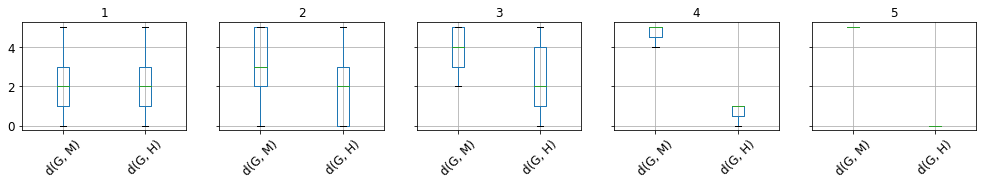

In [62]:
df = merged_df
import editdistance
df['gpt2_heu_distance'] = df['gpt2_segmentation'].combine(df['heuristics_segmentation'], editdistance.eval)
df['gpt2_gold_distance'] = df['heuristics_segmentation'].combine(df['gold'], editdistance.eval)
df['heu_gold_distance'] = df['gpt2_segmentation'].combine(df['gold'], editdistance.eval)
df = df[['gpt2_heu_distance', 'gpt2_gold_distance', 'heu_gold_distance']]
import numpy as np

df = df.astype(int)
for item in ['gpt2_heu_distance', 'gpt2_gold_distance', 'heu_gold_distance']:
    df[item] = df[item].apply(lambda x: 5 if x > 5 else x)

df = df.rename(columns={
    "gpt2_heu_distance": "d(M, H)",
    "gpt2_gold_distance": "d(G, M)",
    "heu_gold_distance": "d(G, H)"
})

plot = df.set_index("d(M, H)").groupby("d(M, H)").boxplot(layout=(1,6), rot=45, fontsize=12, figsize=(20,2))

plot